Descripción
Podemos registrar muchas características de una persona, y buscar ver si algunas influyen o
no en otras. Realiza las siguientes actividades para verificarlo.
1. Considerando las variables earn, height y age, vamos a suponer que nuestro dataset
fuera una población completa. (Prepara los datos adecuadamente).

a. Realiza 5 pruebas con muestras de tamaño n = 25, en cada caso, con niveles
de significancia diferentes pero inferiores a 0,1, para confirmar o rechazar las
siguientes hipótesis considerando las alternativas. Crea para ello una fórmula
que reciba los parámetros adecuados y responda "con nivel de confianza del
...%, se acepta la hipótesis nula/alternativa".

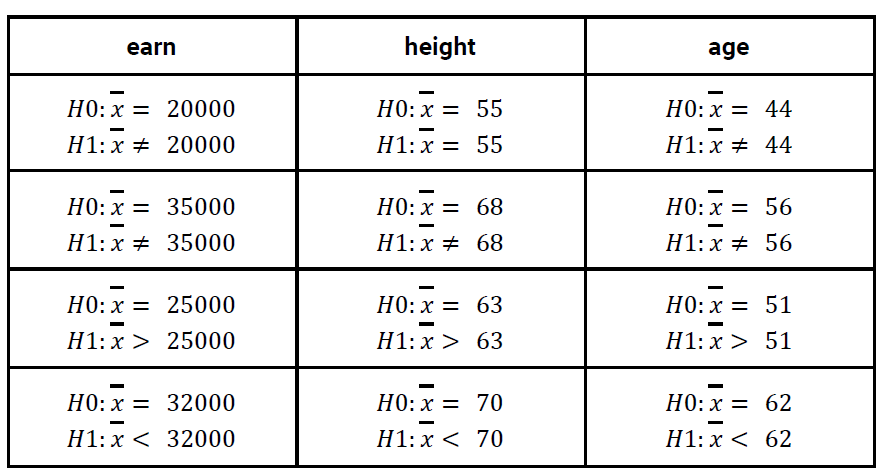

In [1]:
# importar librerias
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np
from scipy import stats
import funciones as fn

In [2]:
# cargar informacion
df = pd.read_csv('earnings.csv')
#df

In [3]:
# revision
df.info()     # informacion general del df
print(df.shape)   # dimension del data
# identifico por columnas la cantidad de valores nan
# esto para tenerlo en consideracion en los analisis de los proximos puntos
print("** lista de valores nan ********")
print(df.isna().sum())   # revisar si existen valores nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   height            1816 non-null   int64  
 1   weight            1789 non-null   float64
 2   male              1816 non-null   int64  
 3   earn              1816 non-null   float64
 4   earnk             1816 non-null   float64
 5   ethnicity         1816 non-null   object 
 6   education         1814 non-null   float64
 7   mother_education  1572 non-null   float64
 8   father_education  1521 non-null   float64
 9   walk              1816 non-null   int64  
 10  exercise          1816 non-null   int64  
 11  smokenow          1815 non-null   float64
 12  tense             1815 non-null   float64
 13  angry             1815 non-null   float64
 14  age               1816 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 212.9+ KB
(1816, 15)
** lista de valores

In [4]:
# proceso pruebas requeridas para columna Earn (GANACIAS)
columna="earn"
# lista con las variables a procesar
proceso=[(20000,'two-sided'),
         (35000,'two-sided'),
         (25000,'greater'),
         (32000,'less'),
        ]
# calculo media poblacional
media_p=df[columna].mean()

# ciclo para procesar la lista
for  media_h,cola in proceso:
    # significancia menor a 0.1
    significancia=0.09
    # para cada fila de la lista, ejecuto 5 pruebas para cada una de ellas
    for x  in range(5):
        print(f"inicio proceso {x + 1}: para {columna} y cola hipotesis alternativa tipo {cola}")
        # selecciona muestra aleatoria de 25 registros al azar
        muestra = df[columna].sample(n=25, replace=False)
        # Eliminar filas con valores faltantes en los datos
        muestra = muestra.dropna()
        # calculo media muestral
        media_m=muestra.mean()
        # llamo a funcion para ejecutar prueba
        fn.prueba_hipotesis(muestra,media_h,significancia,cola,media_p,media_m)
        print(f"fin de proceso {x + 1}")
        # cambio el valor de significancia para cumplir condicion 0.09 - 0.07 - 0.05 - 0.03 - 0.01
        significancia=significancia - 0.02
    


inicio proceso 1: para earn y cola hipotesis alternativa tipo two-sided
---------------------------------------------------------------------------
Resultado: Con nivel de confianza 91.0%, se acepta la hipotesis nula
---------------------------------------------------------------------------
Valor t (estadistico): 0.28738575888346
Valor p (p_value)    : 0.776283792166703
nivel significancia  : 0.09
nivel de confianza   : 91.0%
media hipotetica     : 20000
media muestral       : 21180.0
media poblacional    : 21147.3
---------------------------------------------------------------------------
La media hipotetica es 20000, con un margen de error de 7253.93 y confiabilidad del 91.0%
---------------------------------------------------------------------------
diferencias en las medias muestral e hipotetica    : 1180.0
porcentaje de diferencia: 5.57%
diferencias en las medias poblacional e hipotetica : 1147.3
porcentaje de diferencia: 5.43%
----------------------------------------------------

In [5]:
# proceso pruebas requeridas para columna height (ALTURA)
columna="height"
# lista con las variables a procesar
proceso=[(55,'two-sided'),
         (68,'two-sided'),
         (63,'greater'),
         (70,'less'),
        ]
# calculo media poblacional
media_p=df[columna].mean()

# ciclo para procesar la lista
for  media_h,cola in proceso:
    # significancia menor a 0.1
    significancia=0.09
    # para cada fila de la lista, ejecuto 5 pruebas para cada una de ellas
    for x  in range(5):
        print(f"inicio proceso {x + 1}: para {columna} y cola hipotesis alternativa tipo {cola}")
        # selecciona muestra aleatoria de 25 registros al azar
        muestra = df[columna].sample(n=25, replace=False)
        # Eliminar filas con valores faltantes en los datos
        muestra = muestra.dropna()
        # calculo media muestral
        media_m=muestra.mean()
        # llamo a funcion para ejecutar prueba
        fn.prueba_hipotesis(muestra,media_h,significancia,cola,media_p,media_m)
        print(f"fin de proceso {x + 1}")
        # cambio el valor de significancia para cumplir condicion 0.09 - 0.07 - 0.05 - 0.03 - 0.01
        significancia=significancia - 0.02

inicio proceso 1: para height y cola hipotesis alternativa tipo two-sided
---------------------------------------------------------------------------
Resultado: Con nivel de confianza 91.0%, se acepta la hipotesis alternativa -> la media muestral es diferente a la media hipotetica
---------------------------------------------------------------------------
Valor t (estadistico): 14.561614235278165
Valor p (p_value)    : 2.0673677084888966e-13
nivel significancia  : 0.09
nivel de confianza   : 91.0%
media hipotetica     : 55
media muestral       : 66.8
media poblacional    : 66.57
---------------------------------------------------------------------------
La media hipotetica es 55, con un margen de error de 1.43 y confiabilidad del 91.0%
---------------------------------------------------------------------------
diferencias en las medias muestral e hipotetica    : 11.8
porcentaje de diferencia: 17.66%
diferencias en las medias poblacional e hipotetica : 11.57
porcentaje de diferencia: 17

In [6]:
# proceso pruebas requeridas para columna age (EDAD)
columna="age"
# lista con las variables a procesar
proceso=[(44,'two-sided'),
         (56,'two-sided'),
         (51,'greater'),
         (62,'less'),
        ]
# calculo media poblacional
media_p=df[columna].mean()

# ciclo para procesar la lista
for  media_h,cola in proceso:
    # significancia menor a 0.1
    significancia=0.09
    # para cada fila de la lista, ejecuto 5 pruebas para cada una de ellas
    for x  in range(5):
        print(f"inicio proceso {x + 1}: para {columna} y cola hipotesis alternativa tipo {cola}")
        # selecciona muestra aleatoria de 25 registros al azar
        muestra = df[columna].sample(n=25, replace=False)
        # Eliminar filas con valores faltantes en los datos
        muestra = muestra.dropna()
        # calculo media muestral
        media_m=muestra.mean()
        # llamo a funcion para ejecutar prueba
        fn.prueba_hipotesis(muestra,media_h,significancia,cola,media_p,media_m)
        print(f"fin de proceso {x + 1}")
        # cambio el valor de significancia para cumplir condicion 0.09 - 0.07 - 0.05 - 0.03 - 0.01
        significancia=significancia - 0.02

inicio proceso 1: para age y cola hipotesis alternativa tipo two-sided
---------------------------------------------------------------------------
Resultado: Con nivel de confianza 91.0%, se acepta la hipotesis nula
---------------------------------------------------------------------------
Valor t (estadistico): -1.1262839329196785
Valor p (p_value)    : 0.27118171885642134
nivel significancia  : 0.09
nivel de confianza   : 91.0%
media hipotetica     : 44
media muestral       : 40.4
media poblacional    : 42.93
---------------------------------------------------------------------------
La media hipotetica es 44, con un margen de error de 5.65 y confiabilidad del 91.0%
---------------------------------------------------------------------------
diferencias en las medias muestral e hipotetica    : -3.6
porcentaje de diferencia: -8.91%
diferencias en las medias poblacional e hipotetica : -1.07
porcentaje de diferencia: -2.48%
---------------------------------------------------------------

b. Calcula la media poblacional para cada variable. ¿Son correctos los
resultados obtenidos por tus pruebas?

In [7]:
print(f"la media para Earn es {df['earn'].mean()} -> {np.mean(df['earn'])}")
print(f"la media para Height es {df['height'].mean()} -> {np.mean(df['height'])}")
print(f"la media para Age es {df['age'].mean()} -> {np.mean(df['age'])}")


la media para Earn es 21147.296255506608 -> 21147.296255506608
la media para Height es 66.56883259911895 -> 66.56883259911895
la media para Age es 42.934471365638764 -> 42.934471365638764


Nota:
para las tres variables utilizadas en las pruebas de hipotesis tiene una tendencia similar, cuando el valor hipotetico se acerca a la media poblacional, la hipotesis nula es aceptada, en caso contrario es rechazada, pero dependiendo del margen de error, es aprobada (margen de error alto), estos casos nos dan falsos positivos y faldos negativos dependiento de la prueba.
genere comparaciones en cada prueba hipotetica con media muestral y media poblacional lo que me permitio generarme un escenario para analizar las hipotesis y al revisar deducir los que indique anteriormente.


2. Crea una función que estime la proporción de hombres en el dataset, considerando
una muestra de 50 individuos, con niveles de significancia de 0,05 y 0,01. Escribe con
palabras tus resultados ejecutar la función e interpreta. Compara con la proporción
real.

In [8]:
print("---------------------------------------------------------------")
print("Proceso 1: muestra con un 0.05 de significancia----------------")
print("---------------------------------------------------------------")
# selecciona aleatoria de 50 registros al azar y que no se repita el registro
df_muestra = df.sample(n=50, replace=False)
# elimino los valores nan
df_muestra = df_muestra.dropna()
# defino significancia
significancia=0.05
# Tamaño de la muestra
n = len(df_muestra)
# Contar la cantidad de hombres en la muestra
cantidad= df_muestra[df_muestra["male"] == 1]["male"].count()
# que_valor
que_valor="Hombres"
#ejecuto funcion para estimar la proporcion
fn.estima_proporcion(significancia,n,cantidad,que_valor)


print("---------------------------------------------------------------")
print("Proceso 2: muestra con un 0.01 de significancia----------------")
print("---------------------------------------------------------------")
# defino significancia
significancia=0.01
# Tamaño de la muestra
n = len(df_muestra)
# Contar la cantidad de hombres en la muestra
cantidad= df_muestra[df_muestra["male"] == 1]["male"].count()
# que_valor
que_valor="Hombres"
#ejecuto funcion para estimar la proporcion
fn.estima_proporcion(significancia,n,cantidad,que_valor)

print("---------------------------------------------------------------")
print("Proceso 3: poblacion con un 0.05 de significancia--------------")
print("---------------------------------------------------------------")
# defino significancia
significancia=0.05
# Tamaño de la muestra
n = len(df["male"].dropna())
# Contar la cantidad de hombres en la muestra
cantidad= df[df["male"] == 1]["male"].count()
# que_valor
que_valor="Hombres"
#ejecuto funcion para estimar la proporcion
fn.estima_proporcion(significancia,n,cantidad,que_valor)

print("---------------------------------------------------------------")
print("Proceso 4: poblacion con un 0.01 de significancia--------------")
print("---------------------------------------------------------------")
# defino significancia
significancia=0.01
# Tamaño de la muestra
n = len(df["male"].dropna())
# Contar la cantidad de hombres en la muestra
cantidad= df[df["male"] == 1]["male"].count()
# que_valor
que_valor="Hombres"
#ejecuto funcion para estimar la proporcion
fn.estima_proporcion(significancia,n,cantidad,que_valor)


---------------------------------------------------------------
Proceso 1: muestra con un 0.05 de significancia----------------
---------------------------------------------------------------
Intervalo de confianza del 95.0% para la proporción de Hombres con la cantidad de 40 registros:
(0.17985179739402782, 0.47014820260597223)
nivel de significancia: 0.05
---------------------------------------------------------------
Proceso 2: muestra con un 0.01 de significancia----------------
---------------------------------------------------------------
Intervalo de confianza del 99.0% para la proporción de Hombres con la cantidad de 40 registros:
(0.1342429266154837, 0.5157570733845163)
nivel de significancia: 0.01
---------------------------------------------------------------
Proceso 3: poblacion con un 0.05 de significancia--------------
---------------------------------------------------------------
Intervalo de confianza del 95.0% para la proporción de Hombres con la cantidad de 1816 reg

Nota:
la probabilidad poblacional, tanto del 95% y 99% para la proporcion de hombres en los intervalos de confianza son muy similares y podemos señalar que van en el rango de 34% al 40% de hombres.
comparandolo con la muestra, los intervalor tienen una diferencia de 5 puntos, ademas estan muy por encima de los intervalos de la poblacion.
podemos deducir que con la muestra no es suficiente para llegar a intervalos de confianza de la poblacion, recordar que se eligen al azar los registros, tal vez esto deberia respetar una proporcion en la muestra para que sea mas parecida a la poblacional 

3. Considerando el dataset como una muestra, verifica si el género (male=1 significa
‘hombre”) influye sobre el sueldo “earn” de las personas. Explica y justifica tu
procedimiento.

In [9]:
# Filtrar los datos para obtener los sueldos de hombres y mujeres
sueldo_hombres = df[df["male"] == 1]["earn"]
sueldo_mujeres = df[df["male"] == 0]["earn"]

# Eliminar filas con valores nulos 
sueldo_hombres = sueldo_hombres.dropna()
sueldo_mujeres = sueldo_mujeres.dropna()

# Realizar una prueba de hipótesis (prueba t de muestras independientes)
t_stat, p_value = stats.ttest_ind(sueldo_hombres, sueldo_mujeres, equal_var=False)

# Nivel de significancia (alfa)
alpha = 0.05

# Comprobar hipotesis nula 
if p_value < alpha:
    print(f"Resultado: Con nivel de confianza {round((1 - alpha)*100,2)}%, se rechaza la hipótesis nula")
else:
    print(f"Resultado: Con nivel de confianza {round((1 - alpha)*100,2)}%, se Acepta la hipótesis nula")

# Imprimir el valor t y el valor p
print(f"Valor t (estadistico): {t_stat}")
print(f"Valor p (p_value): {p_value}")
print(f"nivel significancia: {alpha}")
print(f"media remuneracion hombres: {sueldo_hombres.mean()}")
print(f"media remuneracion mujeres: {sueldo_mujeres.mean()}")
print(f"porcentaje diferencia: {round((((sueldo_hombres.mean() - sueldo_mujeres.mean()) / sueldo_hombres.mean()) *100), 2)}%")

Resultado: Con nivel de confianza 95.0%, se rechaza la hipótesis nula
Valor t (estadistico): 11.86459381795286
Valor p (p_value): 2.7373648004575493e-30
nivel significancia: 0.05
media remuneracion hombres: 30105.17925925926
media remuneracion mujeres: 15847.935144609992
porcentaje diferencia: 47.36%


Nota:
debido a que el valor p (p_value) es menor que el nivel de significancia, rechazamos la hipotesis nula de la prueba.
podemos sugerir que la remuneracion media entre las dos poblaciones(hombres versus mujeres) es diferente.
al comparar las medias nos percatamos que existe dicha diferencia. 